<wall of text>

In this project I will try yo look at video game scores and sales and I will try to find how do they corellate. I have found few amateurish data sets for my project.

Original data sources: 
Games rating:
https://www.dropbox.com/s/09sh15zbtwg9eu3/gamedata.xlsx
Games sales:
https://www.kaggle.com/gregorut/videogamesales

Importing libraries

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyodbc
%matplotlib inline

Getting game rating data from excel file

In [106]:
df = pd.read_excel(open('C:\\Users\\d\\Desktop\\uw\\hw\\lastproject\\gamedata.xlsx','rb'), sheetname='data')
df.head()

,Game,Platform,Score,Genre
0,Wolfenstein: The New Order,Xbox One,7.8,Shooter
1,Mario Kart 8,Wii U,9.0,"Racing, Action"
2,Sportsfriends,PlayStation 3,8.7,"Action, Compilation"
3,Sportsfriends,PlayStation 4,8.7,"Action, Compilation"
4,Sportsfriends,PC,8.7,"Action, Compilation"


Getting games sales data from MSSQL, I also change platform name from original data source name to the one that we have in ratings dataset, so we could later map it. We're selecting top 10 gaming platforms by global sales. Sales are in millions.

In [107]:
server = 'DESKTOP-L1PEIU7\SQLEXPRESS'
db = 'FP'

conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE='+ db + ';Trusted_Connection=yes')

sql = """
select 
Global_Sales,
case 
when Platform = 'PS2' then 'PlayStation 2'
when Platform = 'X360' then 'Xbox 360'
when Platform = 'PS3' then 'PlayStation 3'
when Platform = 'DS' then 'Nintendo DS'
when Platform = 'PS' then 'PlayStation'
when Platform = 'GBA' then 'Game Boy Advance'
when Platform = 'PSP' then 'PlayStation Portable'
when Platform = 'PS4' then 'PlayStation 4'
else Platform
end as Platform
from (
SELECT top 10
sum(Global_Sales)as global_sales,
Platform 
FROM vgsales
group by Platform
order by sum(Global_Sales) desc
)a
"""


dfsql = pd.read_sql(sql, conn)

Looking at how game score is distributed 

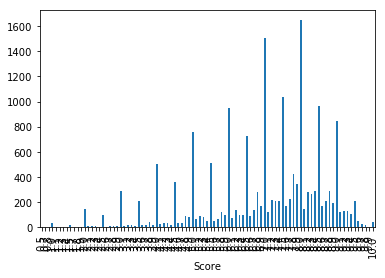

In [108]:
scoreCountGroup = df[['Score']].groupby('Score').size()
scoreCountGroup.plot(kind='bar')

Round up values for easier analysis

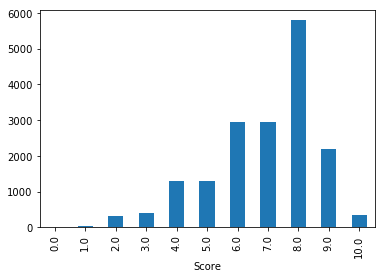

In [109]:
df2=df.round(0)
scoreCountGroupRound = df2[['Score']].groupby('Score').size().plot(kind='bar')

From the graph we can see that most games have a score of 8 that is pretty high for average score. This could say us that average game is rated higher than average score. 

Looking at game scores by game platfroms

In [110]:
platformAvg = df[['Platform','Score']]
platformAvgData = platformAvg.groupby('Platform').mean().sort_values('Score', ascending=False)
platformAvgData =platformAvgData.assign(normalizedScore=(platformAvgData.Score - platformAvgData.Score.min())/(platformAvgData.Score.max() - platformAvgData.Score.min()))
platformAvgData =platformAvgData.assign(recordnumber=df[['Platform']].groupby('Platform').size())
platformAvgData

,Score,normalizedScore,recordnumber
Platform,,,
WonderSwan Color,8.600000,1.000000,1
Pocket PC,8.500000,0.986842,1
Macintosh,8.104286,0.934774,70
Atari 5200,8.000000,0.921053,2
TurboGrafx-CD,8.000000,0.921053,3
Web Games,8.000000,0.921053,1
Game Boy,7.813636,0.896531,22
Super NES,7.732143,0.885808,28
iPad,7.704255,0.882139,94


From this data we should probablly exclude systems that have under 100 games for more correct view.

In [111]:
platformAvgData[platformAvgData.recordnumber>99]

,Score,normalizedScore,recordnumber
Platform,,,
Dreamcast,7.370280,0.838195,286
iPhone,7.298896,0.828802,815
PlayStation Vita,7.259649,0.823638,114
Nintendo 3DS,7.238150,0.820809,173
Xbox,7.199635,0.815741,822
PlayStation 3,7.186718,0.814042,1295
Wireless,7.177680,0.812853,905
PC,7.105849,0.803401,3026
Xbox 360,7.104172,0.803181,1582


Now we can see that mean score is around 7 and if we would look at score normalazing it it would be about 8

In [112]:
platformAvgData['Platform'] = platformAvgData.index
platformAvgData

,Score,normalizedScore,recordnumber,Platform
Platform,,,,
WonderSwan Color,8.600000,1.000000,1,WonderSwan Color
Pocket PC,8.500000,0.986842,1,Pocket PC
Macintosh,8.104286,0.934774,70,Macintosh
Atari 5200,8.000000,0.921053,2,Atari 5200
TurboGrafx-CD,8.000000,0.921053,3,TurboGrafx-CD
Web Games,8.000000,0.921053,1,Web Games
Game Boy,7.813636,0.896531,22,Game Boy
Super NES,7.732143,0.885808,28,Super NES
iPad,7.704255,0.882139,94,iPad


Adding score data to our top 10 platforms by sales all time

In [113]:
dff = pd.merge(dfsql,platformAvgData)
dff

,Global_Sales,Platform,Score,normalizedScore,recordnumber
0,1233.46,PlayStation 2,6.869162,0.772258,1683
1,969.61,Xbox 360,7.104172,0.803181,1582
2,949.35,PlayStation 3,7.186718,0.814042,1295
3,909.81,Wii,6.300074,0.697378,1347
4,818.96,Nintendo DS,6.283173,0.695154,1040
5,727.39,PlayStation,6.562290,0.731880,952
6,313.56,Game Boy Advance,6.629194,0.740683,620
7,291.71,PlayStation Portable,6.751840,0.756821,625
8,278.10,PlayStation 4,7.697872,0.881299,47
9,255.05,PC,7.105849,0.803401,3026


Now we can see that our global sales data and record number is not really correlated, this is the result of having two different data sets that are not related to each other, so we can not conclude any meaningful analysis.

Conclusion:
The average rating of the game is above average mark,after brief analysis why is it like that I found out few interesting stories. Sometimes game publishers rely on scores so much that everything that is rated below 8 is considered a below average game. So there are a lot of interest to please game review companies to get the higher score. The second reason for it it might be that game reviewers only look at the newest and most trending games that are usually higher quality.
Sales data by platform did not surprise me at all, all most popular consoles and other means of gaming are there. It is shame that there is no data for mobile games like android or IOs.
This task is also a great example how few data sets that should be linked together are not. Because of quite small data size these data sets are more suitable to be analyzed separately than together.
Thank you for your time.